<a href="https://colab.research.google.com/github/Dhyey79/Electromyography/blob/main/Electromyography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


Gradient boosting machines (GBMs) are now quite popular, thus machine learning practitioners should grasp how GBMs function. The issue is that knowing all of the mathematical machinery is difficult, yet these details are required to modify the hyper-parameters. (Unlike Random Forests, tuning the hyper-parameters is essential to obtain a good GBM model.) This article's purpose is to explain the idea underlying gradient boosting, give visuals for model creation, explain the mathematics as clearly as possible, and address hard problems like why GBM does "gradient descent in function space." For your convenience, we've divided the debate into three sections. 

1) Gradient boosting: Target distance. To begin, we look at the most prevalent type of GBM, which maximizes the mean squared error (MSE), often known as the L2 loss or cost. (The mean squared error is the sum of the squares of the differences between real targets and predicted values from a series of observations, such as a training or validation set.) A GBM, as we'll see, is a composite model that combines the efforts of numerous weak models to form a strong model, with each new weak model lowering the overall model's mean squared error (MSE). We provide a comprehensive GBM example for a basic data set, replete with calculations and model representations.

2) Gradient boosting: We're on the right track. When a model is optimized using MSE, it seeks outliers since squaring the difference between target and projected values accentuates extreme values. When outliers cannot be removed, it is preferable to optimize the mean absolute error (MAE), also known as the L1 loss or cost. (The MAE is the mean absolute value of the difference between the real and predicted values.) The calculations and visuals for a GBM that optimizes MAE for the same data set as utilized in the previous article to optimize MSE are shown in this second article.

3) Gradient boosting is used to produce gradient descent. The last two sections explain the logic underlying GBM and provide simple formulas for combining weak models to generate a strong regression model. There was no effort to demonstrate how we can derive a generic GBM that works for any loss function. This last article explains that gradient boosting is a kind of gradient descent and so optimizes MSE or MAE depending on the direction vectors used to train the weak models. The discussion relies on some derivative calculus, but it's a necessary read if you want to understand how GBM works in depth. (For a refresher on vectors and derivatives, see The Matrix Calculus You Need For Deep Learning.) We conclude by clearing up some misconceptions about gradient boosting.

Motivation:
Let's begin with a basic example. We want to guess a person's age based on whether they like video games, gardening, and if they wear hats. Our goal is to reduce squared error. We have nine training examples from which to develop our model.
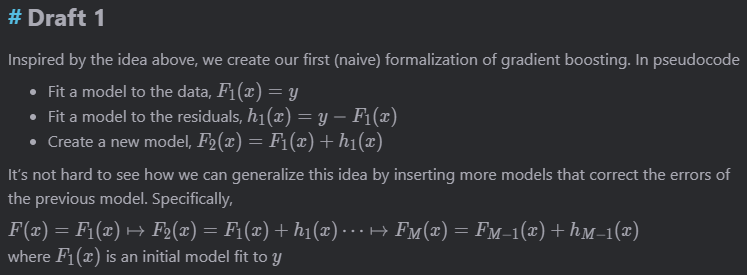

Because we begin by fitting $ F 1(x) $, our objective at each step is to determine $ h m(x) = y - F m(x) $.
Stop. Take note of something. $ h m $ is only a "model." There is no requirement in our concept for it to be a tree-based model. This is one of the more general principles and benefits of gradient boosting. It's actually just a framework for upgrading any poor learner repeatedly. In principle, a well-coded gradient boosting module would let you to "plug in" different classes of weak learners. In practice, $ h m $ is usually always a tree-based learner, therefore it's safe to view $ h m $ as a regression tree like the one in our example for the time being.

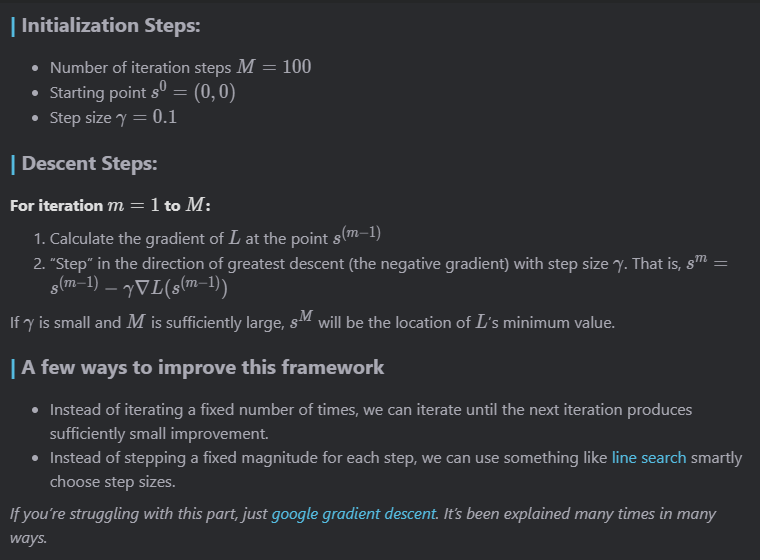

Although a positive mathematical answer to this topic was discovered, it took several years to construct fully functional algorithms based on this solution, such as AdaBoost. These algorithms employ a greedy approach, first constructing a linear combination of simple models (basic algorithms) by re-weighing the input data. The model (often a decision tree) is then constructed using previously erroneously predicted items, which are now given higher weights.

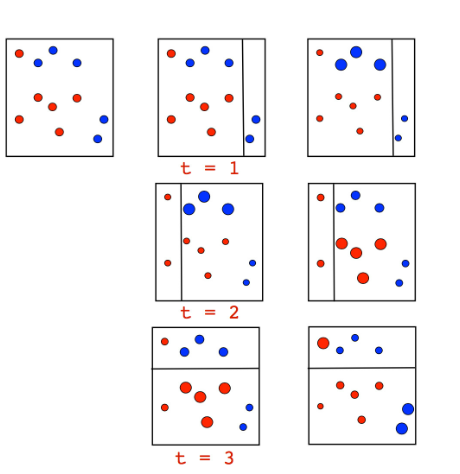


In [103]:
!pip install patool
import patoolib
patoolib.extract_archive("EMG Physical Action Data Set.rar", outdir="/content/drive/MyDrive")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
patool: Extracting EMG Physical Action Data Set.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/EMG Physical Action Data Set.rar"
patool:     with cwd='/content/drive/MyDrive'
patool: ... EMG Physical Action Data Set.rar extracted to `/content/drive/MyDrive'.


'/content/drive/MyDrive'

In [3]:
import jax.tools.colab_tpu
jax.tools.colab_tpu.setup_tpu()
from jax import random
import math
import random as rand
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from numpy import exp

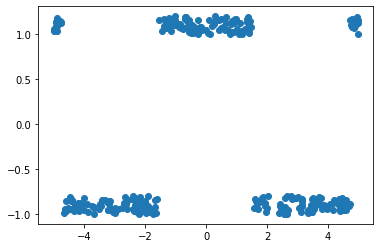

In [4]:
key = random.PRNGKey(758493)
x = random.uniform(key, shape=(300,), minval=-5, maxval=5)
X = []
y = []
for item in x:
  X.append([item])
  yitem  = math.cos(item)
  if yitem > 0:
    y.append(1 + rand.uniform(0.0, 0.2))
  elif yitem < 0:
    y.append(-1 + rand.uniform(0.0, 0.2))
y = jax.numpy.array(y)
X = jax.numpy.array(X)
plt.scatter(X, y)
#plt.plot(X, y)
plt.show()

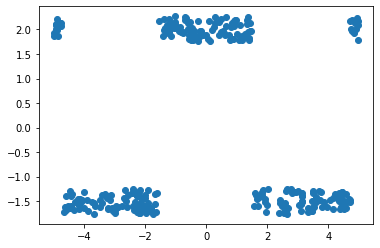

In [5]:
f = jax.numpy.full((len(y), ), fill_value=0.0)
f = -(y - f)
r = (2*y)/(1+exp(2*y*f))
plt.scatter(X, r)
#plt.plot(X, r)
plt.show()

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
Y = []
for item in y:
  if item > 0:
    Y.append(1)
  elif item < 0:
    Y.append(-1)
Y = jax.numpy.array(Y)
Xtrn, Xtst, ytrn, ytst = train_test_split(X, Y, test_size=0.25)
ensemble = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=0.75)
ensemble.fit(Xtrn, ytrn)
ypred = ensemble.predict(Xtst)
err = 1 - accuracy_score(ytst, ypred)
print(err)

0.013333333333333308


In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

import matplotlib.pylab as plt

In [30]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

actions = {} #defining an empty dictionary for action names and corresponding labels

data_dirs = ["/content/drive/MyDrive/EMG Physical Action Data Set/sub1/Aggressive/txt/",
             "/content/drive/MyDrive/EMG Physical Action Data Set/sub1/Normal/txt",
             "/content/drive/MyDrive/EMG Physical Action Data Set/sub2/Aggressive/txt/",
             "/content/drive/MyDrive/EMG Physical Action Data Set/sub2/Normal/txt",
             "/content/drive/MyDrive/EMG Physical Action Data Set/sub3/Aggressive/txt/",
             "/content/drive/MyDrive/EMG Physical Action Data Set/sub3/Normal/txt",
             "/content/drive/MyDrive/EMG Physical Action Data Set/sub4/Aggressive/txt/",
             "/content/drive/MyDrive/EMG Physical Action Data Set/sub4/Normal/txt"]

ind = 0
data = pd.DataFrame()

In [31]:
for dirs in data_dirs :
  for files in os.listdir(dirs):

    with open(os.path.join(dirs, files), "r") as f:  # from all the files within all the dirs, read the tab separated files.

     # Extracting the 8 columns names from filenames
      temp = pd.read_csv(f.name,
                        sep = "\t",
                        header = None, 
                          names = ["ch" + str(i) for i in range(1, 9)] # 8 input channels
                         )

In [32]:
for dirs in data_dirs :
  for files in os.listdir(dirs):

      with open(os.path.join(dirs, files), "r") as f:  # from all the files within all the dirs, read the tab separated files.

     # Extracting the 8 columns names from filenames
        temp = pd.read_csv(f.name,
                        sep = "\t",
                        header = None, 
                          names = ["ch" + str(i) for i in range(1, 9)] # 8 input channels
                        )
        temp_chunked = pd.DataFrame()
        for i in range(0, len(temp), 10):
          temp_chunked = temp_chunked.append(temp.iloc[i:i+10].max(), ignore_index = True)
        labels = [files[:-4] for i in range(len(temp_chunked))] # remove the last 4 characters=".txt" from the filename to get the activity name
        actions[files[:-4]] = ind # We have about 20 activity classes and they are assigned a numeric labels in the actions dictionary.
        temp_chunked["Action"] = labels
        data = pd.concat([data, temp_chunked])

        ind+=1
print(actions)

{'Elbowing': 60, 'Frontkicking': 61, 'Hamering': 62, 'Headering': 63, 'Kneeing': 64, 'Pulling': 65, 'Punching': 66, 'Pushing': 67, 'Sidekicking': 68, 'Slapping': 69, 'Bowing': 70, 'Clapping': 71, 'Handshaking': 72, 'Hugging': 73, 'Jumping': 74, 'Running': 75, 'Seating': 76, 'Standing': 77, 'Walking': 78, 'Waving': 79}


In [33]:
data.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,Action
0,717.0,391.0,2615.0,-29.0,4000.0,205.0,1084.0,4000.0,Elbowing
1,1036.0,251.0,2989.0,162.0,4000.0,2971.0,3062.0,4000.0,Elbowing
2,3705.0,30.0,4000.0,549.0,4000.0,2940.0,-1767.0,-205.0,Elbowing
3,2679.0,347.0,1566.0,167.0,-4000.0,2758.0,-3965.0,785.0,Elbowing
4,1689.0,77.0,4000.0,-246.0,4000.0,2422.0,-1767.0,360.0,Elbowing


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79763 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ch1     79763 non-null  float64
 1   ch2     79763 non-null  float64
 2   ch3     79763 non-null  float64
 3   ch4     79763 non-null  float64
 4   ch5     79763 non-null  float64
 5   ch6     79763 non-null  float64
 6   ch7     79763 non-null  float64
 7   ch8     79763 non-null  float64
 8   Action  79763 non-null  object 
dtypes: float64(8), object(1)
memory usage: 6.1+ MB


In [35]:
data.describe()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
count,79763.000000,79763.000000,79763.000000,79763.000000,79763.000000,79763.000000,79763.000000,79763.000000
mean,689.188007,381.233379,630.218372,400.195868,839.268909,621.860386,641.232953,662.612540
std,1171.093655,848.478115,1155.961744,931.070186,1856.322168,1360.091421,1496.063403,1455.182986
min,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000
25%,18.000000,28.000000,15.000000,6.000000,32.000000,34.500000,30.000000,25.000000
50%,190.000000,99.000000,125.000000,66.000000,217.000000,135.000000,119.000000,172.000000
75%,908.000000,359.000000,758.000000,364.000000,1919.000000,888.000000,1000.000000,1047.500000
max,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000


In [36]:
X=data.drop(["Action"], axis=1)
X

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,717.0,391.0,2615.0,-29.0,4000.0,205.0,1084.0,4000.0
1,1036.0,251.0,2989.0,162.0,4000.0,2971.0,3062.0,4000.0
2,3705.0,30.0,4000.0,549.0,4000.0,2940.0,-1767.0,-205.0
3,2679.0,347.0,1566.0,167.0,-4000.0,2758.0,-3965.0,785.0
4,1689.0,77.0,4000.0,-246.0,4000.0,2422.0,-1767.0,360.0
...,...,...,...,...,...,...,...,...
995,11.0,132.0,2.0,20.0,74.0,50.0,50.0,80.0
996,826.0,124.0,30.0,34.0,41.0,26.0,45.0,36.0
997,1175.0,132.0,23.0,7.0,43.0,46.0,42.0,61.0
998,1108.0,49.0,21.0,17.0,44.0,58.0,87.0,36.0


In [37]:
data["Action"].value_counts()

Hamering        4466
Clapping        4043
Bowing          4024
Pushing         4010
Slapping        3997
Waving          3991
Walking         3990
Pulling         3967
Jumping         3965
Punching        3964
Headering       3963
Running         3963
Hugging         3952
Handshaking     3942
Standing        3934
Seating         3932
Sidekicking     3927
Kneeing         3921
Elbowing        3916
Frontkicking    3896
Name: Action, dtype: int64

In [38]:
Y=data["Action"]
Y

0      Elbowing
1      Elbowing
2      Elbowing
3      Elbowing
4      Elbowing
         ...   
995      Waving
996      Waving
997      Waving
998      Waving
999      Waving
Name: Action, Length: 79763, dtype: object

In [39]:
Y = Y.map(actions)
Y.head()
print(Y.value_counts())

62    4466
71    4043
70    4024
67    4010
69    3997
79    3991
78    3990
65    3967
74    3965
66    3964
63    3963
75    3963
73    3952
72    3942
77    3934
76    3932
68    3927
64    3921
60    3916
61    3896
Name: Action, dtype: int64


In [40]:
X.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,717.0,391.0,2615.0,-29.0,4000.0,205.0,1084.0,4000.0
1,1036.0,251.0,2989.0,162.0,4000.0,2971.0,3062.0,4000.0
2,3705.0,30.0,4000.0,549.0,4000.0,2940.0,-1767.0,-205.0
3,2679.0,347.0,1566.0,167.0,-4000.0,2758.0,-3965.0,785.0
4,1689.0,77.0,4000.0,-246.0,4000.0,2422.0,-1767.0,360.0


In [41]:
import numpy as np
import jax.numpy as jnp

In [42]:
from sklearn.model_selection import train_test_split
X1 = np.array(X.values.tolist())
X2 = jnp.array(X1)
Y1 = np.array(Y.values.tolist())
Y2 = jnp.array(Y1)

In [43]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 30)

In [44]:
print("Sizes of the sets created are:\nTraining set: {X2_train.shape[0]}\nTest set: {X2_test.shape[0]}")
X2_train.shape, X2_test.shape, Y2_train.shape, Y2_test.shape

Sizes of the sets created are:
Training set: {X2_train.shape[0]}
Test set: {X2_test.shape[0]}


((63810, 8), (15953, 8), (63810,), (15953,))

In [45]:
model_gbm = GradientBoostingClassifier(n_estimators=5000,
                                       learning_rate=0.05,
                                       max_depth=3,
                                       subsample=0.5,
                                       validation_fraction=0.1,
                                       n_iter_no_change=20,
                                       max_features='log2',
                                       verbose=1)
model_gbm.fit(X2_train, Y2_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           2.9167           0.0750          106.04m
         2           2.8536           0.0639          106.75m
         3           2.7917           0.0596          106.70m
         4           2.7353           0.0564          106.75m
         5           2.6879           0.0442          106.80m
         6           2.6460           0.0414          106.79m
         7           2.6089           0.0378          106.89m
         8           2.5728           0.0366          106.78m
         9           2.5387           0.0318          106.79m
        10           2.5080           0.0301          106.74m
        20           2.2777           0.0174          106.43m
        30           2.1336           0.0109          106.25m
        40           2.0349           0.0071          106.02m
        50           1.9649           0.0050          105.67m
        60           1.9181           0.0043          105.32m
       

GradientBoostingClassifier(learning_rate=0.05, max_features='log2',
                           n_estimators=5000, n_iter_no_change=20,
                           subsample=0.5, verbose=1)

In [46]:
len(model_gbm.estimators_)

442

In [50]:
model_gbm.score(X2_test, Y2_test)

0.457970287720178

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
reg = LogisticRegression(solver= 'liblinear').fit(X2_train, Y2_train)

In [54]:
preds = reg.predict_proba(X2_test)
print(preds)

[[1.17874836e-01 5.55585651e-02 9.64714933e-02 ... 2.76294200e-05
  3.06677034e-02 1.66920705e-04]
 [1.91385108e-02 2.71469133e-02 2.77415896e-02 ... 1.14394343e-01
  3.87418367e-02 9.77631306e-02]
 [6.91147296e-02 5.90942970e-02 8.31631459e-02 ... 9.06741546e-04
  4.33655214e-02 5.36683218e-03]
 ...
 [3.15564757e-02 3.72910994e-02 4.26378556e-02 ... 4.98837557e-02
  4.96369599e-02 7.20719900e-02]
 [6.63401779e-02 1.07317913e-01 1.41051072e-01 ... 1.24106231e-10
  4.33001830e-02 1.22981882e-08]
 [3.76872051e-02 4.05717761e-02 4.67534850e-02 ... 3.17165293e-02
  5.26736491e-02 6.46732040e-02]]


In [52]:
acc = roc_auc_score(Y2_test, preds, multi_class= 'ovr')
print(acc)

0.750308449453751
